In [50]:
import pandas as pd
import numpy as np
import glob

from sklearn.linear_model import LinearRegression

from sklearn import preprocessing
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

from sklearn.model_selection import train_test_split

In [2]:
files = glob.glob('*.csv')

## Preprocessing 

In [3]:
df= pd.read_csv(files[0], encoding='iso-8859-1')

In [11]:
set(df['loan_status'])

{'COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF'}

###  Remove irrelevant Attributes

In [8]:
sub_df = df.loc[df['loan_status']!='COLLECTION'][['Principal', 'terms', 'past_due_days', 'age', 'education', 'Gender']]

In [15]:
def scale_edu(x):
    scale = {
        'High School or Below': 0,
        'college':1,
        'Bechalor': 2,
        'Master or Above': 3
    }
    return scale[x]

In [16]:
sub_df['Gender'] = sub_df['Gender'].apply(lambda x: 1 if x=='male' else 0)
sub_df['education'] = sub_df['education'].apply(lambda x: scale_edu(x))
sub_df['past_due_days'].fillna(0, inplace=True)

In [18]:
normalize_scale = {}

In [19]:
for attr in sub_df.columns:
    normalize_scale[attr] = [sub_df[attr].min(), sub_df[attr].max()]

In [61]:
sub_df.head()

,Principal,terms,past_due_days,age,education,Gender
0,1000,30,0.0,45,0,1
1,1000,30,0.0,50,2,0
2,1000,30,0.0,33,2,0
3,1000,15,0.0,27,1,1
4,1000,30,0.0,28,1,0


In [28]:
features = ['Principal', 'terms', 'age', 'education', 'Gender']

In [91]:
X = preprocessing.normalize(sub_df[features])
# X = sub_df[features]

In [92]:
y = sub_df['past_due_days']

In [71]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =0.4)

In [78]:
from sklearn.neural_network import MLPRegressor

In [80]:
reg = LinearRegression().fit(train_X, train_y)

In [81]:
train_y_score = reg.predict(train_X)
test_y_score = reg.predict(test_X)

In [82]:
reg.score(train_X, train_y)

0.009903445402204003

In [75]:
features

['Principal', 'terms', 'age', 'education', 'Gender']

In [76]:
sub_df.head()

,Principal,terms,past_due_days,age,education,Gender
0,1000,30,0.0,45,0,1
1,1000,30,0.0,50,2,0
2,1000,30,0.0,33,2,0
3,1000,15,0.0,27,1,1
4,1000,30,0.0,28,1,0


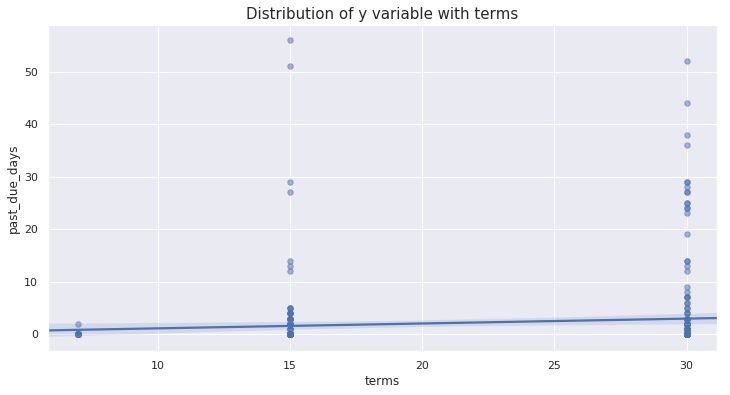

In [83]:
plt.figure(figsize=(12,6))
sns.regplot(x=var_x, y='past_due_days', data=sub_df, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_x, fontsize=12)
plt.ylabel('past_due_days', fontsize=12)
plt.title("Distribution of y variable with " + var_x, fontsize=15)
plt.show()

In [84]:
nn = MLPRegressor()

In [85]:
nn.fit(train_X, train_y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [86]:
pred_train_y = nn.predict(train_X)

In [87]:
pred_test_y = nn.predict(test_X)

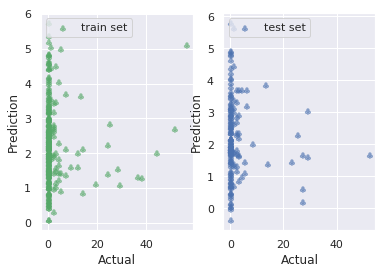

In [90]:
plt.subplot(121)
plt.scatter(train_y,pred_train_y , c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="train set")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.legend(loc='upper left')

plt.subplot(122)
plt.scatter(test_y,pred_test_y , c="b", alpha=0.5, marker=r'$\clubsuit$',
            label="test set")
plt.xlabel("Actual")
plt.ylabel("Prediction")
plt.legend(loc='upper left')

plt.show()